

# **TC4033.11**
# Visión computacional para imágenes y video

## Actividad 1

## Prof. Titular
Dr. Gilberto Ochoa Ruiz

## Prof.Tutor
Francisco Solorzano Domínguez

## Equipo 31
### Integrantes
* Ada Jimena Vargas Aguirre   -                 A01701619
* Irving Morales Cedeño -                       A01796208
* Juan Felipe Caro Valencia -                   A01796224
* Marco Polo Navarrete Rodríguez -              A01796238
---




# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [✍ Task 1](#task1)
5. [Negative Images](#negative)
6. [✍ Task 2](#task2)
7. [Logarithmic Transformation](#log)
8. [Image Binarizer](#bin)
9. [Image Quantizer](#quant)
10. [✍ Task 3](#task3)
11. [✍ Task 4](#task4)
12. [📚 Bibliography & references](#bibref)




## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
DIR ="/content/drive/MyDrive/Colab Notebooks/MNA/T4/TC4033 - Visión computacional/A1"
os.chdir(DIR)

<class 'numpy.ndarray'>


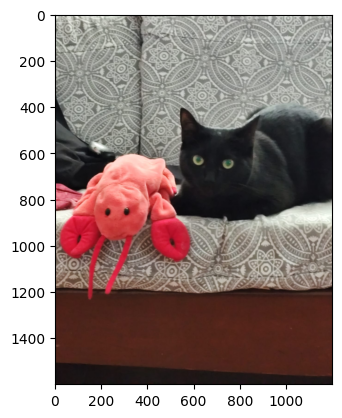

In [ ]:
img1 = mpimg.imread('cat_and_lobster.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [ ]:
img1.shape

(1600, 1200, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

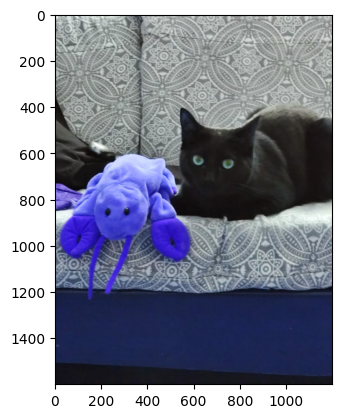

In [ ]:
img2 = cv2.imread('cat_and_lobster.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(shape=(1600, 1200, 3))


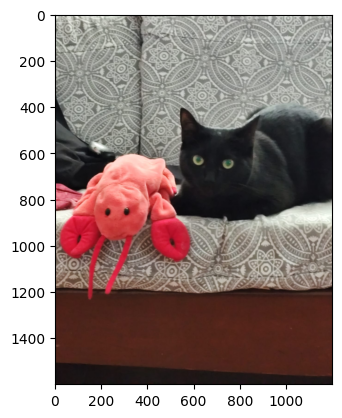

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


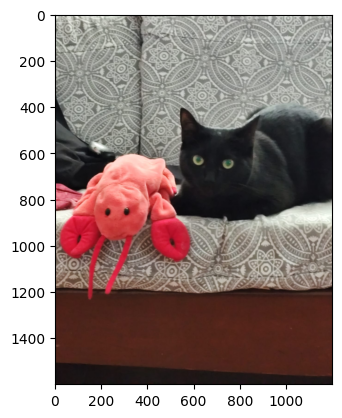

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('cat_and_lobster.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

(1600, 1200, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

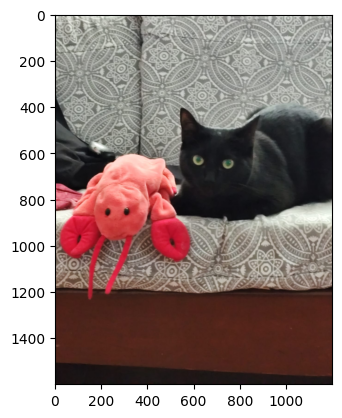

In [ ]:
# Save the image
np.save('cat.npy', img3)

# Load the image
img3 = np.load('cat.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 1200 x 1600
New size: 200 x 200


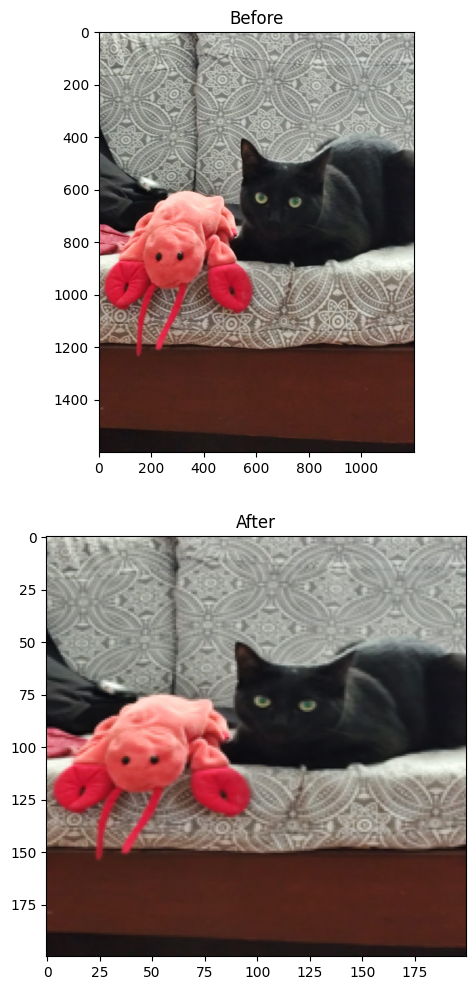

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 1200 x 1600
Scaled size: 150 x 200
New size: 200 x 200


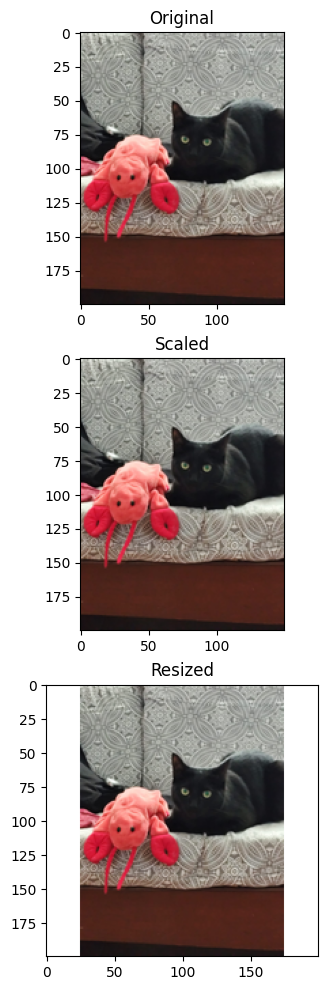

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.Resampling.LANCZOS) # Línea modificada, el método ha sido modificado en la librería PIL
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## ✍ **TASK 1** <a class="anchor" id="task1"></a>

Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Colab sobre imágenes propias.
---


### **1. Contrast stretching**

El estiramiento de contraste. Es una transformación lineal. Nos ayuda a mejorar el enfoque es usado para mejorar las imágenes de bajo contraste normalmente por iluminación deficiente, sensor de imagen con bajo rango, problemas con la apertura de la lente, entre otros.
Esto es porque Los niveles de gris por debajo o por encima de este punto medio se transfieren con diferentes pendientes de línea para que la imagen ajustada pueda volverse más brillante en la región más tenue. Como tiene una función lineal es de fácil implementación y la imagen procesada mejora su rango dinámico que puede producir cierta discontinuidad en el histograma resultante, puede perder detalles en frecuencias altas para la imagen final. (Yang2006).

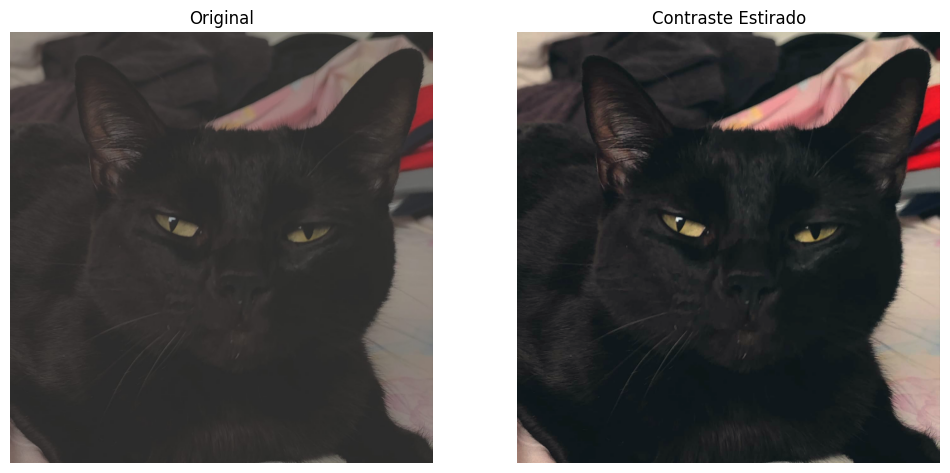

In [ ]:
# Leer imagen original
orig_img_bgr = cv2.imread('cat.jpg') # Foto de una gata negra mirando fijamente a la cámara

# Separar la imagen en 3 canales (BGR)
b,g,r = cv2.split(orig_img_bgr)

# Aplicar estiramiento de contraste a cada canal individualmente
# En este caso lo que se hace es normalizar, fijando los valores del rango 0 a 255. Se hace un reescalamiento.
b_stretched = cv2.normalize(b, None,alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX)
g_stretched = cv2.normalize(g, None,alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX)
r_stretched = cv2.normalize(r, None,alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX)

# Unir los canales nuevamente
stretched_contrast_bgr = cv2.merge([b_stretched,g_stretched,r_stretched])

# Conversión a RGB de ambas imágenes para poder mandarlas al plot correctamente
orig_img_rgb = cv2.cvtColor(orig_img_bgr,cv2.COLOR_BGR2RGB)
stretched_contrast_rgb = cv2.cvtColor(stretched_contrast_bgr,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(orig_img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_contrast_rgb)
plt.title('Contraste Estirado')
plt.axis('off')

plt.show()


### **2. Intensity level slicing transformation**

También es una transformación lineal. Se usa para preservar los detalles de la imagen, se usa para resaltar ciertos rangos de niveles de gris en la imagen original, segmentando ciertas regiones de grises del resto de la imagen. Es útil cuando ciertas características están contenidas en diferentes niveles de gris. (Singh2016)

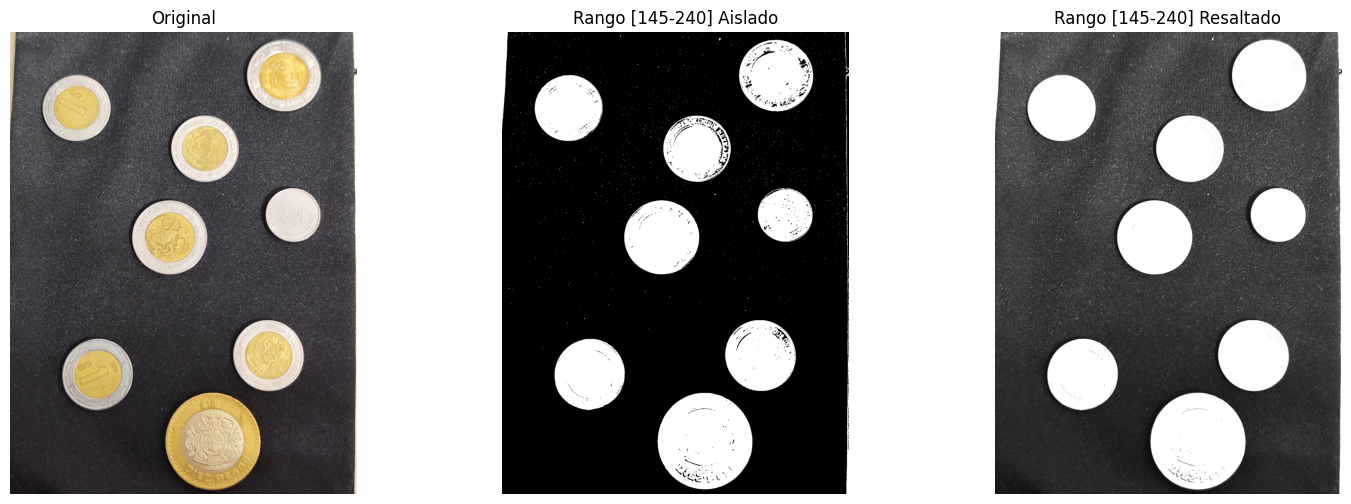

In [ ]:
# Leer imagen original
orig_img_bgr = cv2.imread('pesos.jpg') # Foto de monedas de distintas denominaciones

# Convertir a escala de grises
gray_img= cv2.cvtColor(orig_img_bgr,cv2.COLOR_BGR2GRAY)

# Definir rango de intensidades a resaltar
b = 240   # límite superior, aquí interesa ver lo más claro
a = 145  # límite inferior, modificado manualmente

# Aislar el rango (fondo negro)
# Evaluar si el pixel está dentro del rango de interés y crear la máscara
mask = cv2.inRange(gray_img,a,b)

# Otra opción es "colorear" imagen, aplicar la máscara en la imagen original para mostrar el color detectado
slicing_w_bg = gray_img.copy()
slicing_w_bg[mask == 255] = 255


# Conversión a RGB de ambas imágenes para poder mandarlas al plot correctamente
orig_img_rgb = cv2.cvtColor(orig_img_bgr,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(orig_img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap = 'gray')
plt.title(f'Rango [{a}-{b}] Aislado')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(slicing_w_bg, cmap = 'gray')
plt.title(f'Rango [{a}-{b}] Resaltado')
plt.axis('off')

plt.show()


### **3. Bit-plane slicing transformation**.

El corte de plano de bits es otra forma de transformación por partes que se utiliza para la apariencia total de la imagen mediante bits específicos que se utilizan para los niveles de gris de los píxeles y determina la adecuación del número de bits utilizados para cuantificar cada píxel en la compresión de imágenes. Las operaciones de filtros espaciales se realizan sobre un píxel y sus vecinos inmediatos; esto también se llama operaciones de vecinos. (Singh2016).



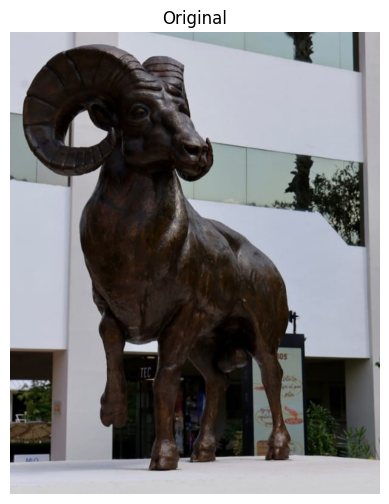

In [ ]:
# Leer imagen original
orig_img_bgr = cv2.imread('ram.jpg') # Foto de estatua del borrego salvaje del ITESM en campus Aguascalientes

# Conversión a RGB de ambas imágenes para poder mandarlas al plot correctamente
orig_img_rgb = cv2.cvtColor(orig_img_bgr,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(18, 6))

plt.subplot(1, 1, 1)
plt.imshow(orig_img_rgb)
plt.title('Original')
plt.axis('off')
plt.show()

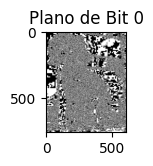

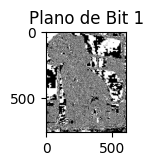

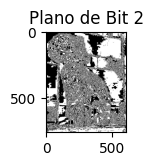

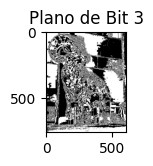

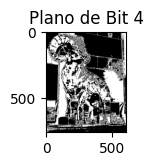

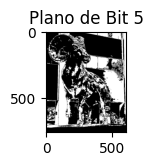

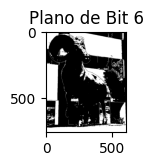

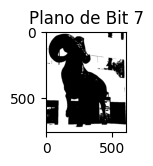

In [ ]:
# Convertir a escala de grises
gray_img= cv2.cvtColor(orig_img_bgr,cv2.COLOR_BGR2GRAY)

# Iterar por cada uno de los planos de 8 bits
for i in range(8):

  # Crear máscara
  mask = 2**i # Sirve para detectar un bit específico en cada pixel
  # Aplicar la máscara, compara cada pixel para evaluar si el bit estaba "prendido" o no.
  bit_plane = cv2.bitwise_and(gray_img,mask)
  bit_plane[bit_plane > 0] = 255 # Vuelve a la imagen B/N (binaria y de alto contraste)

  plt.figure(figsize=(18, 6))

  plt.subplot(4,4,i+1)
  plt.imshow(bit_plane,cmap = 'gray')
  plt.title(f'Plano de Bit {i}')

## Negative Images <a class="anchor" id="negative"></a>

Se usan para mejorar los detalles de una imagen en un sector grises o blancos embebidos en un area obscura dentro de una imagen (Sing2016)

In [ ]:
orig_img = cv2.imread('flower.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

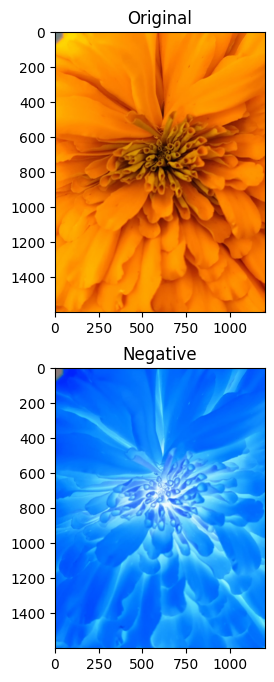

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

##✍ **TASK 2** <a class="anchor" id="task2"></a>

Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en una fila de Google Colab, justificar brevemente tu investigación y haciendo una demo sencilla.
---


De acuerdo con Cardona et al. (2024), el negativo de una imagen tiene un valor particular en el encripción de imágenes, específicamente en el cifrado perceptual, cuyo objetivo es que la imagen no sea percibida correctamente por un ser humano. Para ello se emplea en la técnica NPT (Negative-Positive Transformation), la que a su vez es un elemento de los sistemas EtC (Encryption-then-Compression).

Los sistemas EtC priorizan la seguridad de la información al ser transmitida; por ello primero se aplica un cifrado, mientras que la compresión puede ser una tarea delegada a un tercero.

Ahora bien, la transformación NPT se aplica por píxel de forma selectiva; es decir, algunos bloques son alterados y otros permanecen intactos, con base en una clave secreta que consiste en un mapa de bits (Cardona et al,2024).

De tal forma que la imagen cifrada aparece como una especie de mosaico confuso o desordenado, pero sin afectar el contenido de cada bloque o sus propiedades estadísticas (como su histograma), a diferencia de un cifrado como AES, donde la imagen es convertida en datos aleatorios e incompresibles.


A continuación, se incluye una demostración sencilla de este tipo de aplicación:

Dimensiones de la imagen:1200x1600
Tamaño de bloque:16x16
Cuadrícula de bloques:75x100

Clave secreta creada:
[[0 1 1 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 0 0 1]]


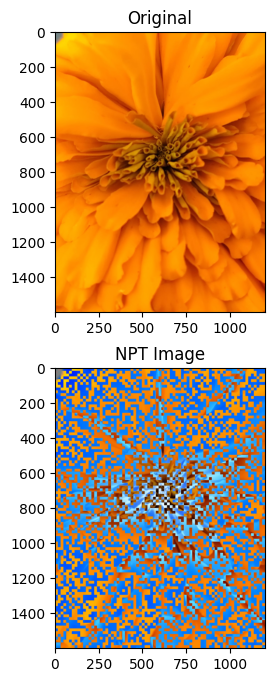

In [ ]:
# Implementar NPT por bloques
def apply_npt(img,block_size):
  """
  Esta función simula el cifrado donde se aplica NPT aleatoriamente
  a bloques dentro de una imagen.
  """
  # Crear una copia, evitar modificar la imagen original
  img_c = img.copy()

  # Obtener dimensiones de la imagen
  height, width,_ = img_c.shape # Como es RGB hay 3 valores, pero solo necesitamos los 2 primeros
  print(f"Dimensiones de la imagen:{width}x{height}")

  # Calcular cantidad de bloques según el alto y ancho de la imagen
  # Usar // para asegurar un número entero como resultado
  num_block_y = height // block_size
  num_block_x = width // block_size
  print(f"Tamaño de bloque:{block_size}x{block_size}")
  print(f"Cuadrícula de bloques:{num_block_x}x{num_block_y}")

  # Generar la clave secreta
  # Dado que es una simulación, se crea una matriz binaria aleatoria
  # que representa la clave secreta
  s_key = np.random.randint(0,2, size = (num_block_y,num_block_x))
  print("\nClave secreta creada:")
  print(s_key)

  # Aplicar NPT
  for y in range(num_block_y):
    for x in range(num_block_x):
      # Si bit de la clave = 1 --> invertir
      # Si bit de la clave = 0 --> dejar original
      if s_key[y,x] == 1:
        # Calcular las coordenadas del bloque en la imagen
        y_start = y * block_size
        y_end = y_start + block_size
        x_start = x * block_size
        x_end = x_start + block_size

        # Seleccionar el bloque
        block = img_c[y_start:y_end,x_start:x_end]

        # Aplicar inversión de píxeles (negativo)
        # Como se vio en el ejemplo anterior, la fórmula es:
        # p' = 255 - p
        inverted_block = cv2.bitwise_not(block)

        # Reemplazar bloque original por el modificado
        img_c[y_start:y_end,x_start:x_end] = inverted_block


  return img_c

##############################
# Cargar imagen original y convertir a RGB
orig_bgr_img = cv2.imread('flower.jpg') # Foto de detalle de cempoalxóchitl
orig_rgb_img = cv2.cvtColor(orig_bgr_img,cv2.COLOR_BGR2RGB)

# Definir tamaño de bloque
block_size = 16 # Modificable

# Aplicar transformación
demo = apply_npt(orig_rgb_img, block_size)

fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_rgb_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(demo)
a.set_title('NPT Image')

plt.show()

No obstante, es importante recalcar que este tipo de transformación por si sola es débil como método de seguridad, por lo que debe ser complementada con otros métodos como rotación de bloque o permutación (Cardona et al, 2024).

## Logarithmic Transformation <a class="anchor" id="log"></a>
Esta técnica de dominio espacial, se trata directamente con los píxeles de la imagen. Los valores de píxeles se manipulan para lograr
mejoras. La imagen se transfiere primero al dominio de la frecuencia. Esto significa que, estas operaciones de mejora se realizan en la transformada de Fourier de la imagen y son calculadas primero. Las operaciones de mejora se realizan en la transformada de Fourier de la imagen y luego se realiza la transformada de Fourier inversa para modificar el brillo, el contraste o la distribución de los niveles de grises de la imagen. En consecuencia, el valor de píxel (intensidades) de la imagen de salida se modificará de acuerdo con la función de transformación. (Manikpuri2014).

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
orig_img = cv2.imread('cat_stretch.jpg') # Foto de gata negra estirándose, su rostro no es visible
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

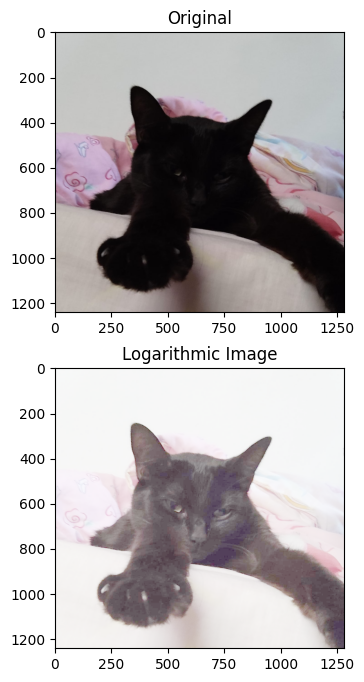

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarización de Pixeles (set pixel values to 0 or 1) en el dominio del procesamiento, la binarización se puede utilizar para reconocer texto y símbolos, o procesar documentos.  Identificar objetos con siluetas distintivas, como componentes en un transportador en una planta de fabricación y determinar hacia donde apuntan los objetos. (Yousefi2011)

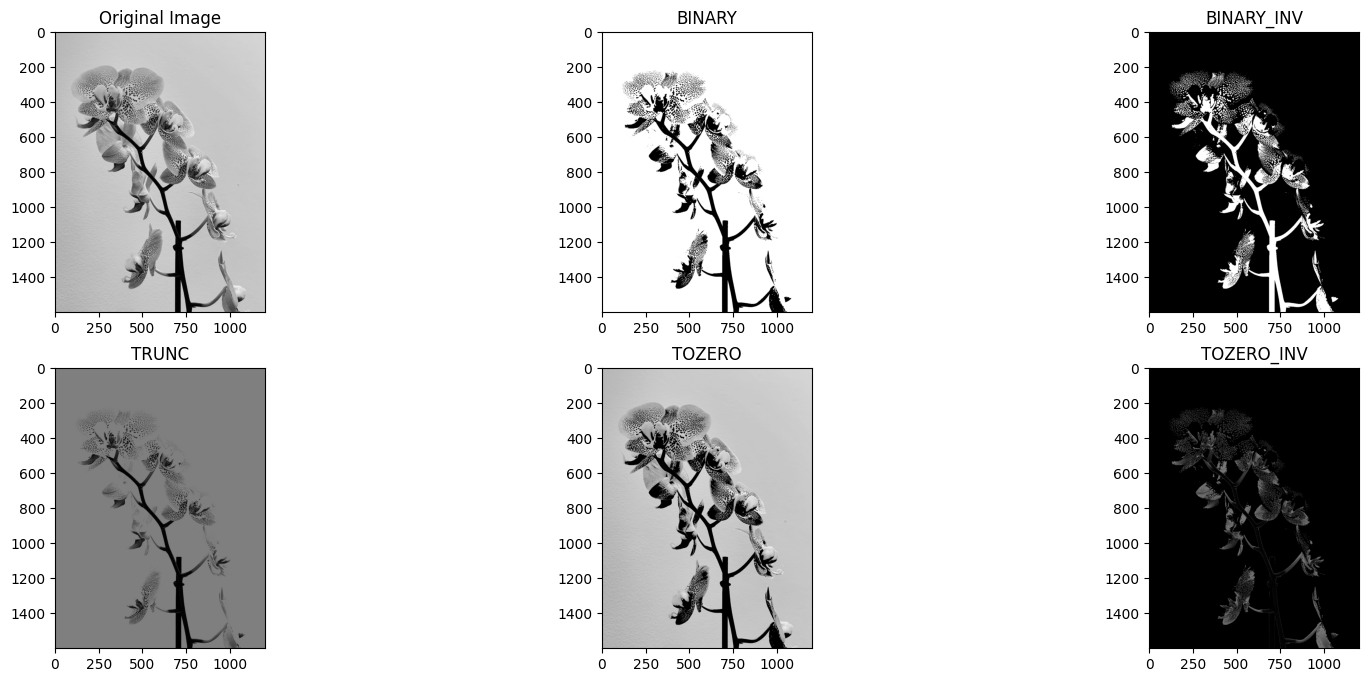

In [ ]:
orig_img = cv2.imread('orchids.jpg') # Foto de orquídea phalaenopsis en escala de grises
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

Es utilizado a menudo para mejorar la imagen por medio de la reducción de distorsión y la reducción del rango, tiene otras aplicaciones como producir una mejora en la compresión de las imágenes al reducir el rango de datos con los que lidiar. (Thai2017).

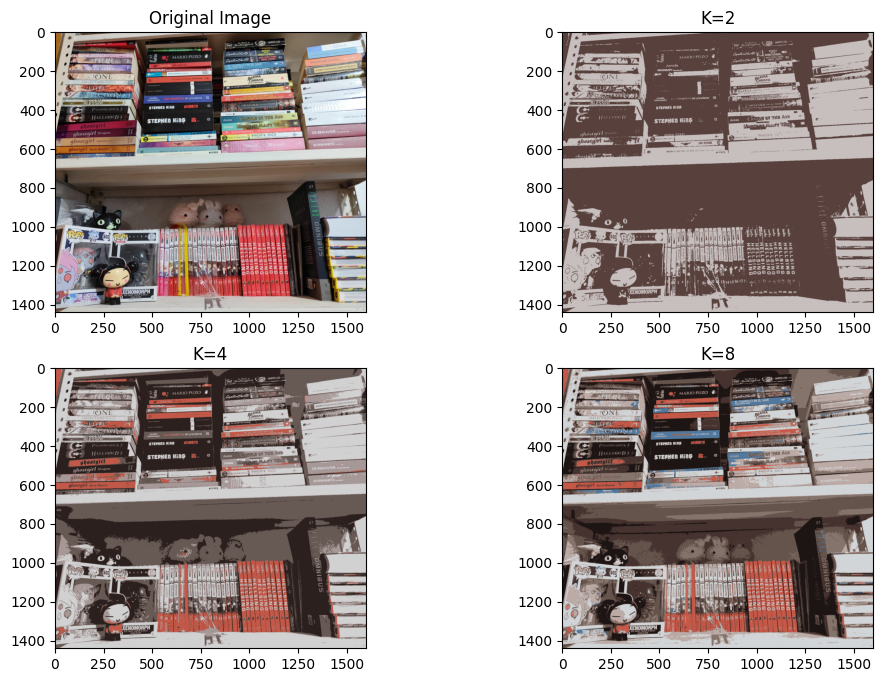

In [ ]:
orig_img = cv2.imread('shelf.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

##✍ **TASK 3** <a class="anchor" id="task3"></a>

Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en una fila de Google Colab, justifica brevemente tu investigación y haz una demo sencilla.
---


La corrección de gamma puede aplicarse para el mejoramiento de imágenes médicas, por ejemplo en aquellas obtenidas en resonancias magnéticas (MRI, por sus siglas en inglés).

En Sahnoun et al (2020), se propone un método adaptativo de mejora de contraste para MRI's de la médula espinal, el cual se basa en una combinación de corrección de gama con los algoritmos DWT-SVD, llamado LL-GAGC. Esta combinación pretende mejorar adaptativamente el contraste en imágenes oscuras y al mismo tiempo preservar información de detalles y bordes.

En este caso, la corrección gamma resulta útil gracias a que permite resaltar selectivamente el brillo en las regiones más oscuras y de tonos medios. Es así cómo se mejora el contraste en zonas específicas. Por lo que permite que detalles y bordes cruciales, como los que se encuentran en la médula espinal, sean más visibles.

A continuación, se presenta una breve demostración de la corrección gamma:



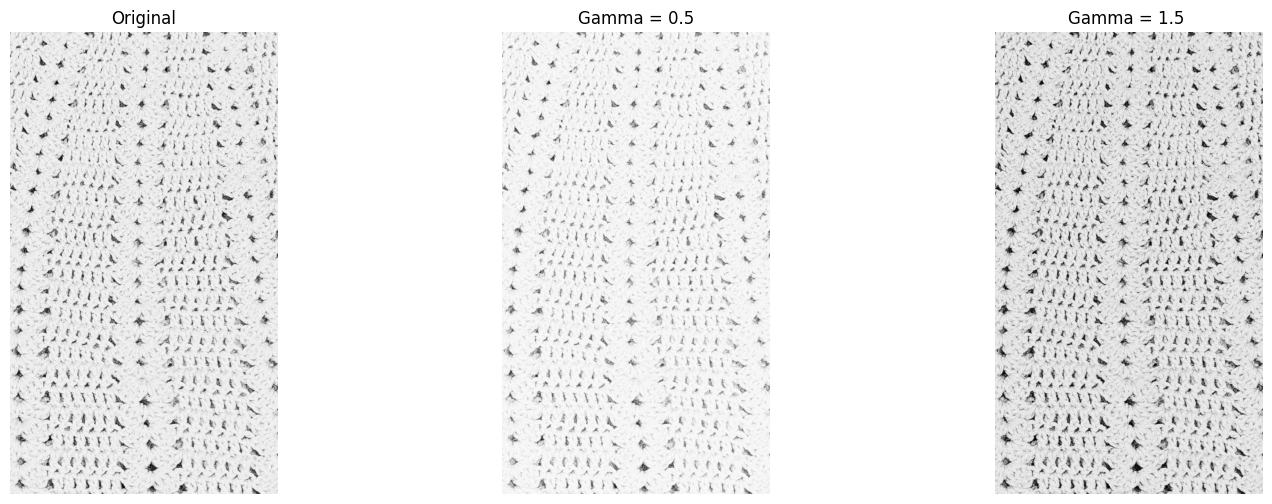

In [ ]:
orig_img_bgr = cv2.imread('stitches.jpg') # Foto de puntadas a crochet

# Convertir a escala de grises
orig_img_g = cv2.cvtColor(orig_img_bgr,cv2.COLOR_BGR2GRAY)

def select_gamma(img,gamma = 1.0):
  # Crear LUT (Look Up Table para mapeo de valores (0-255) a los valores ajustados por gamma)

  table = np.array([((i/255.0)**gamma) *255 for i in np.arange(0,256)]).astype("uint8")

  # Retornar corrección gamma
  return cv2.LUT(img, table)

if orig_img_g is not None:
  # Aclarar imagen
  clear_gamma = 0.5
  clear_img = select_gamma(orig_img_g, gamma = clear_gamma)

  # Oscurecer imagen / menos luz
  dark_gamma = 1.5
  dark_img = select_gamma(orig_img_g, gamma = dark_gamma)


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(orig_img_g, cmap = 'gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clear_img, cmap = 'gray')
plt.title(f'Gamma = {clear_gamma}')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dark_img,cmap= 'gray')
plt.title(f'Gamma = {dark_gamma} ')
plt.axis('off')

plt.show()


##✍ **TASK 4** <a class="anchor" id="task4"></a>
Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en una fila de Google Colab, justificar brevemente tu investigación, haciendo una demo sencilla.
---

La Angiografía por Sustracción Digital (ASD por sus siglas en inglés) es una de las principales aplicaciones de la sustracción de imágenes.

Una ASD permite obtener una imagen donde las venas y arterias son visibles para así identificar si hay algún problema en el flujo de la sangre; para ello, es necesario inyectar al paciente con un medio contrastante, el cual permitirá que las venas se puedan apreciar en las imágenes por rayos X (Standford Medicine, s.f.). Aquí, la técnica de sustracción de imágenes entra en acción cuando se "resta" digitalmente la imagen sin el medio de contraste de la que ya lo tiene, donde el resultado es una imagen nítida del sistema vascular.

Además, esta técnica también permite análisis cuantitativos. Por ejemplo, en Chida et al(2000) se estudió la precisión del ASD basado en la densitometría, método que mide el brillo de los pixeles. Esto es relevante por que para garantizar que el estudio es fiable, debe tenerse una relación lineal entre el valor del pixel en la imagen y la concentración de yodo.

En concentraciones bajas, se observó que la relación se cumplía, pero con concentraciones altas, se perdía. Con esto en mente, se sugirió que es necesario que cada sistema ASD sea calibrado individualmente, en particular si se piensan usar altas concentraciones de yodo (un medio contrastante) para que los médicos puedan interpretar correctamente el brillo de la imagen, por ejemplo, del grosor de un vaso o de la concentración de sangre en el mismo.

A continuación, se demuestra de forma sencilla el funcionamiento de la sustracción de imágenes:

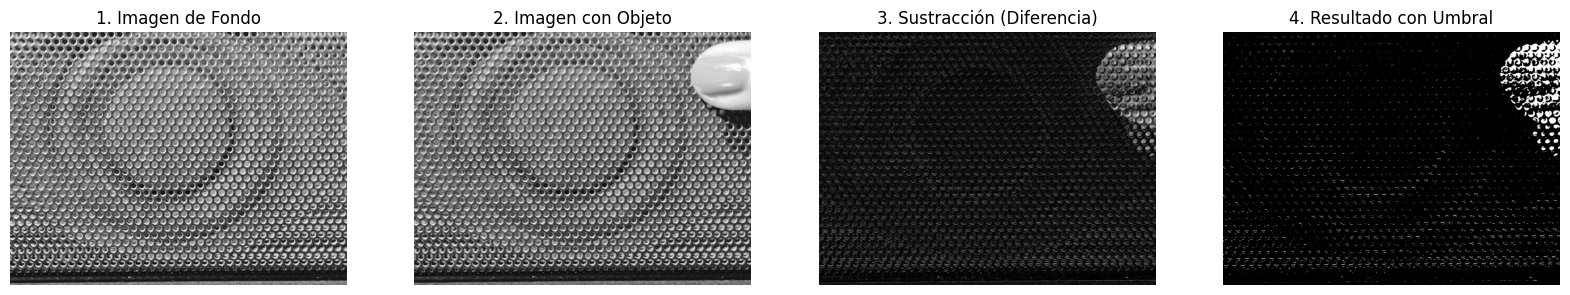

In [ ]:
# Cargar imagen con solo el fondo y convertir a escala de grises
img_bg = cv2.imread("no_thumb.jpg")
img_bg_g = cv2.cvtColor(img_bg, cv2.COLOR_BGR2GRAY)

# Cargar imagen con solo objeto (pulgar) y convertir a escala de grises
img_w_obj = cv2.imread("thumb.jpg")
img_w_obj_g = cv2.cvtColor(img_w_obj, cv2.COLOR_BGR2GRAY)

# Calcular la diferencia absoluta
sub_img = cv2.absdiff(img_w_obj_g,img_bg_g)

# Definir umbral para reducir ruido
retval, result = cv2.threshold(sub_img, 90,255,cv2.THRESH_BINARY)

# Configurar para mostrar 4 imágenes
plt.figure(figsize=(20, 5))

# Fondo Original
plt.subplot(1, 4, 1)
plt.imshow(img_bg_g, cmap='gray')
plt.title('1. Imagen de Fondo')
plt.axis('off')

# Con Objeto
plt.subplot(1, 4, 2)
plt.imshow(img_w_obj_g, cmap='gray')
plt.title('2. Imagen con Objeto')
plt.axis('off')

# Diferencia
plt.subplot(1, 4, 3)
plt.imshow(sub_img, cmap='gray')
plt.title('3. Sustracción (Diferencia)')
plt.axis('off')

# Resultado Final
plt.subplot(1, 4, 4)
plt.imshow(result, cmap='gray')
plt.title('4. Resultado con Umbral')
plt.axis('off')

plt.show()

#📚 **Bibliography & references**  <a class="anchor" id="bibref"></a>

* Cardona, M., Chimal, J., Silva, V., & Flores, R. (2024). Statistical Analysis of the Negative–Positive Transformation in Image Encryption. *Mathematics*, 12(6), 908. https://doi.org/10.3390/math12060908

* Chida, K., Sai, M., Saito, H., Takase, K., Zuguchi, M., Sasaki, M., & Sato, T. (2000). Relationship between the pixel value in digital subtraction angiography and iodine concentration: study in high iodine concentration with original phantom. *Tohoku J Exp Med.*, 190(3):169–76. https://doi.org/10.1620/tjem.190.169

* Gonzalez, R. C., & Woods, R. E. (2018). *Digital Image Processing, Global Edition* (4th ed.). Pearson International Content. https://tec.vitalsource.com/books/9781292223070

* Manikpuri, U., & Yadav, Y. (2014). Image enhancement through logarithmic transformation. International Journal of. https://d1wqtxts1xzle7.cloudfront.net/36849730/SPEC1008852-libre.pdf?1425445947=&response-content-disposition=inline%3B+filename%3DIJIRAE_Image_Enhancement_Through_Logarit.pdf

* Sahnoun, M., Kallel, F., Dammak, M., Kammoun, O., Mhiri, C., Ben-Mahfoudh, K., & Ben-Haminda, A. (2020). Spinal cord MRI contrast enhancement using adaptive gamma correction for patient with multiple sclerosis. *SIViP* 14, 377–385. https://doi.org/10.1007/s11760-019-01561-x

* Singh, G., & Mittal, A. (2014). Various image enhancement techniques-a critical review. International Journal of Innovation and Scientific Research, 10(2), 267-274. https://d1wqtxts1xzle7.cloudfront.net/85090441/IJISR-14-227-01-libre.pdf?1651123812=&response-content-disposition=inline%3B+filename%3DVarious_Image_Enhancement_Techniques_A_C.pdf

* Standford Medicine. (s.f.). *Digital Subtraction Angiography (DSA)*. https://stanfordhealthcare.org/medical-tests/a/angiogram-arteriogram/types/digital-subtraction-angiography.html

* Thai, T. H., Cogranne, R., Retraint, F., & Doan, T. N. C. (2016). JPEG quantization step estimation and its applications to digital image forensics. IEEE Transactions on Information Forensics and Security, 12(1), 123-133. https://ieeexplore.ieee.org/abstract/document/7556411

* Yang, C. C. (2006). Image enhancement by modified contrast-stretching manipulation. Optics & Laser Technology, 38(3), 196-201. https://www.sciencedirect.com/science/article/abs/pii/S0030399204002154

* Yousefi, J. (2011). Image binarization using Otsu thresholding algorithm. Ontario, Canada: University of Guelph, 10(9). https://www.researchgate.net/profile/Jamileh-Yousefi-2/publication/277076039_Image_Binarization_using_Otsu_Thresholding_Algorithm/links/55609b1408ae8c0cab31ea42/Image-Binarization-using-Otsu-Thresholding-Algorithm.pdf